Częstotliwość podstawowa dzwięku: 179.31 Hz
Płeć: Kobieta


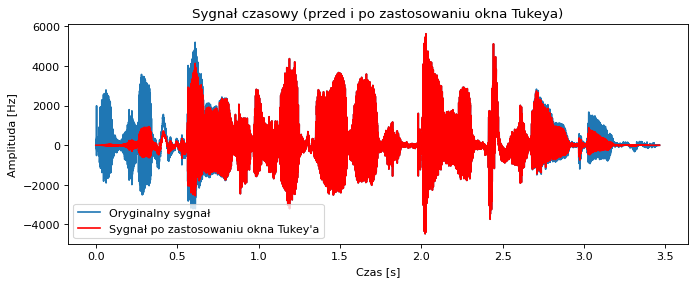

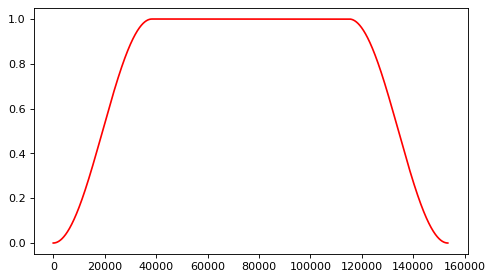

In [17]:
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal.windows import tukey
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=wav.WavFileWarning)

sample_rate, data = wav.read("train/001_K.wav")
#print(data[0], data[100], data[1000])
#print("czestotliwosc probkowania:", sample_rate, "Hz")
#print("ilosc danych", len(data))

mean_data = []
mono = 1
stereo = 2

value_0 = 0
for i in range(len(data)):
    if len(data.shape) == mono:
        if data[i] == 0:
            value_0 += 1
        mean_data.append(float(data[i]))
    elif len(data.shape) == stereo:
        if data[i][0] == 0 or data[i][1] == 0:
            value_0 += 1
        mean_data.append((float(data[i][0]) + float(data[i][1])) / 2)
    else:
        print("Nieznany typ danych")

mean_data = [x for x in mean_data if x != 0]

# Definiowanie parametrów okna tukeya
window_length = len(data)  # Długość okna
alpha = 0.5                # Parametr płaskości dla okna Tukey

# Tworzenie okna tukeya
tukey_window = tukey(window_length, alpha)


multiplied_data = []
for i in range(len(mean_data)):
    multiplied_data.append(mean_data[i] * tukey_window[i])


T = len(multiplied_data)/sample_rate
#print("czas:", T, "s")
f = 1/T
#print("czestotliwosc:", f, "Hz")
#print("ilosc zer:", value_0)

fig = plt.figure(figsize=(10, 25), dpi=80) 

ax = fig.add_subplot(611)
freqs = np.linspace(0, T, len(mean_data))
ax.set_title("Sygnał czasowy (przed i po zastosowaniu okna Tukeya)")
ax.set_xlabel("Czas [s]")
ax.set_ylabel("Amplituda [Hz]")
ax.plot(freqs, mean_data, label= 'Oryginalny sygnał')
ax.plot(freqs, multiplied_data, label= "Sygnał po zastosowaniu okna Tukey'a", color= 'red')
ax.legend()


#ax = fig.add_subplot(612)
fft_spectrum = np.fft.fft(multiplied_data)
fft_spectrum = np.abs(fft_spectrum)
fft_spectrum = fft_spectrum[:len(fft_spectrum)//2]
hps_spectrum = fft_spectrum.copy()

freqs = np.linspace(0, sample_rate//2, len(fft_spectrum))
#ax.plot(freqs, fft_spectrum)


subplots = [613, 614, 615, 616]

#Metoda HPS
harmonics = 4  # =5
for i in range(2, harmonics + 1):
    divided = fft_spectrum[::i]
    hps_spectrum[:len(divided)] *= divided


min_freq = 60
max_freq = 500

# Wyzerowanie wartości poza zakresem min-max
hps_spectrum[(freqs < min_freq) | (freqs > max_freq)] = 0

# Znalezienie częstotliwości podstawowej
fundamental_freq = np.argmax(hps_spectrum) * sample_rate / len(data)
print("Częstotliwość podstawowa dzwięku:", round(fundamental_freq, 3), "Hz")

# Narysowanie okna tukeya
fig = plt.figure(figsize=(7, 4), dpi=80)
ax = fig.add_subplot(111)
ax.plot(tukey_window, color = 'red')


if fundamental_freq < 172.5:
    print("Płeć: Mężczyzna")
else:
    print("Płeć: Kobieta")

